<a href="https://colab.research.google.com/github/RenukaChowdary96/MEDICAL-_Insurance/blob/main/medical_insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
medical_dataset = pd.read_csv('/content/drive/MyDrive/insurance ')

In [ ]:
medical_dataset.head() mm

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
medical_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
medical_dataset.shape

(1338, 7)

In [ ]:
medical_dataset.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
medical_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 600x600 with 0 Axes>

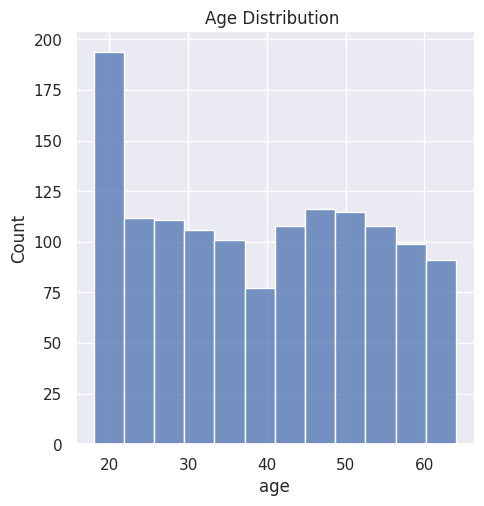

In [ ]:
sns.set()
plt.figure(figsize=(6,6))
sns.displot(medical_dataset['age'])
plt.title('Age Distribution ')
plt.show()

In [ ]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=medical_dataset)
plt.title('Sex')
plt.show()

NameError: name 'sns' is not defined

In [ ]:
medical_dataset['sex'].value_counts()

,count
sex,
male,676
female,662


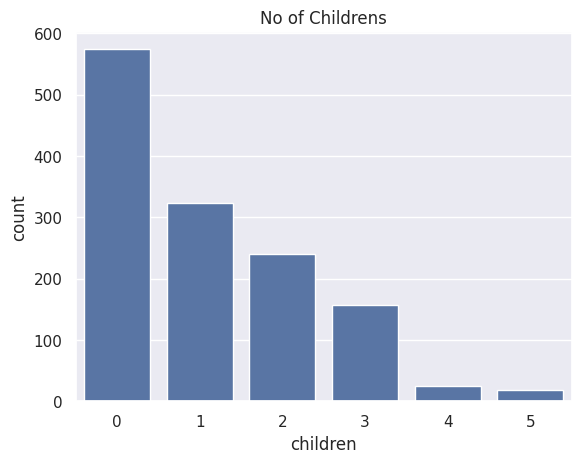

In [ ]:
sns.set()
sns.countplot(x='children',data=medical_dataset)
plt.title('No of Childrens')
plt.show()

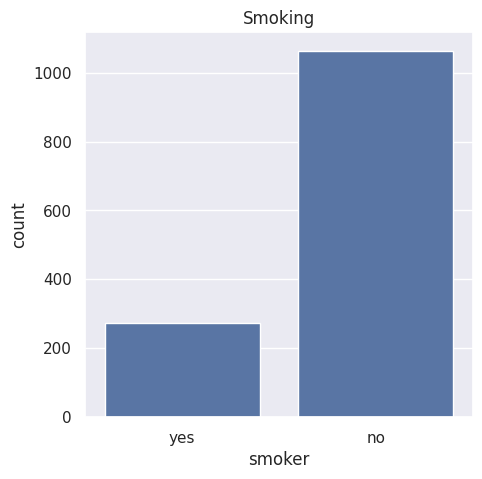

In [ ]:
sns.set()
plt.figure(figsize=(5,5))
sns.countplot(x='smoker',data=medical_dataset)
plt.title('Smoking')
plt.show()

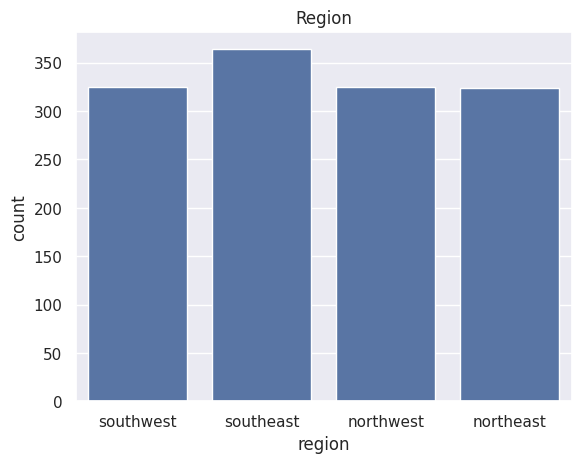

In [ ]:
sns.set()
sns.countplot(x='region',data=medical_dataset)
plt.title('Region')
plt.show()

In [ ]:
medical_dataset['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


In [ ]:
#encoding the sex columns
medical_dataset.replace({'sex':{'male':0,'female':1}},inplace=True)

# smoker columsn

medical_dataset.replace({'smoker':{'yes':0,'no': 1}},inplace=True)

# for the region column

medical_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

In [ ]:
X = medical_dataset.drop(columns='charges',axis=1)
Y  = medical_dataset['charges']

In [ ]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [ ]:
print(Y)


0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [ ]:
regressor = LinearRegression()

In [ ]:
regressor.fit(X_train, Y_train)

LinearRegression()

In [ ]:
training_data_prediction = regressor.predict(X_train)
r2_train = metrics.r2_score(Y_train,training_data_prediction)
print(r2_train)

0.751505643411174


In [ ]:
# prediciting the test data
test_data_predicition = regressor.predict(X_test)
r2_test = metrics.r2_score(Y_test,test_data_predicition)

In [ ]:
print(r2_test)

0.7447273869684076


In [ ]:
input_data = (37,1,30.8,2,1,0)

#chaning it to numpy array
input_data_as_array = np.asarray(input_data)

#reshapping the data
input_data_reshaped = input_data_as_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)

print("The person will get insurance money = ",prediction[0])




The person will get insurance money =  8102.1307143085905


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
